# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [ ]:
# Start your codes here!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.offline import iplot
import plotly as py
import cufflinks as cf


In [ ]:
#Upload From Local
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches (5).csv
Saving players.csv to players (5).csv
Saving winners.csv to winners (5).csv


In [ ]:
import io
df_matches = pd.read_csv(io.BytesIO(uploaded['matches.csv']))
df_players = pd.read_csv(io.BytesIO(uploaded['players.csv']))
df_winners = pd.read_csv(io.BytesIO(uploaded['winners.csv']))

In [ ]:
#Drop NA values 
df_matches = df_matches.dropna()
df_players = df_players.dropna()
df_winners = df_winners.dropna()

In [ ]:
#Rename incorrect name in df
df = df_matches['Home Team Name'].value_counts()
df.tail(30)

Korea DPR                     3
C�te d'Ivoire                 3
Russia                        3
German DR                     3
Slovenia                      3
Senegal                       2
Zaire                         2
Cuba                          2
Slovakia                      2
Togo                          2
Turkey                        2
Czech Republic                2
Iraq                          2
Bolivia                       1
Ukraine                       1
IR Iran                       1
China PR                      1
Norway                        1
rn">Trinidad and Tobago       1
Angola                        1
New Zealand                   1
rn">Serbia and Montenegro     1
Jamaica                       1
rn">Bosnia and Herzegovina    1
Haiti                         1
rn">United Arab Emirates      1
Canada                        1
Iran                          1
Serbia                        1
Wales                         1
Name: Home Team Name, dtype: int64

In [ ]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names.tail(20)

rn">Republic of Ireland       5
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">United Arab Emirates      1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [ ]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'United Arab Emirates',
 'Bosnia and Herzegovina']

In [ ]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']
wrong = wrong + old_name
correct = correct + new_name

In [ ]:
wrong

['rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [ ]:
correct

['Republic of Ireland',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'United Arab Emirates',
 'Bosnia and Herzegovina',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [ ]:
for index, wr in enumerate(wrong):
    df_matches = df_matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    df_players = df_players.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    df_winners = df_winners.replace(wrong[index], correct[index])

In [ ]:
#Casting Type
df_winners['Attendance'] = df_winners['Attendance'].str.replace('.', '').astype('int64')
df_matches = df_matches.astype({"Home Team Goals": int, "Away Team Goals": int, "Attendance": int, "Half-time Home Goals": int, "Half-time Away Goals": int, "RoundID": object, "MatchID": object})


In [ ]:
df_matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals           int64
Away Team Goals           int64
Away Team Name           object
Win conditions           object
Attendance                int64
Half-time Home Goals      int64
Half-time Away Goals      int64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                  object
MatchID                  object
Home Team Initials       object
Away Team Initials       object
dtype: object

In [ ]:
df_winners.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int64
dtype: object

In [ ]:
#Seperate date and time
df_matches['Datetime'] = pd.to_datetime(df_matches['Datetime'])
df_matches['Date'] = df_matches['Datetime'].dt.strftime('%d/%m/%Y')
df_matches['Time'] = df_matches['Datetime'].dt.strftime('%H:%M')
df_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Time
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,13/07/1930,15:00
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,13/07/1930,15:00
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,14/07/1930,12:45
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,14/07/1930,14:50
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,15/07/1930,16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,3.00186e+08,NED,CRC,05/07/2014,17:00
848,2014.0,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,3.00186e+08,BRA,GER,08/07/2014,17:00
849,2014.0,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,3.00186e+08,NED,ARG,09/07/2014,17:00
850,2014.0,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,3.00187e+08,BRA,NED,12/07/2014,17:00


In [ ]:
#add data of World Cup 2018
df_winners_2018 = ({"Year":2018, 
                    "Country":"Russia",  
                    "Winner":"France",
                    "Runners-Up":"Croatia",
                    "Third":"Belgium",
                    "Fourth":"England",
                    "GoalsScored": 169,
                    "QualifiedTeams":32,
                    "MatchesPlayed":64,
                    "Attendance":3030000}) 
df_winners.append(df_winners_2018, ignore_index = True)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



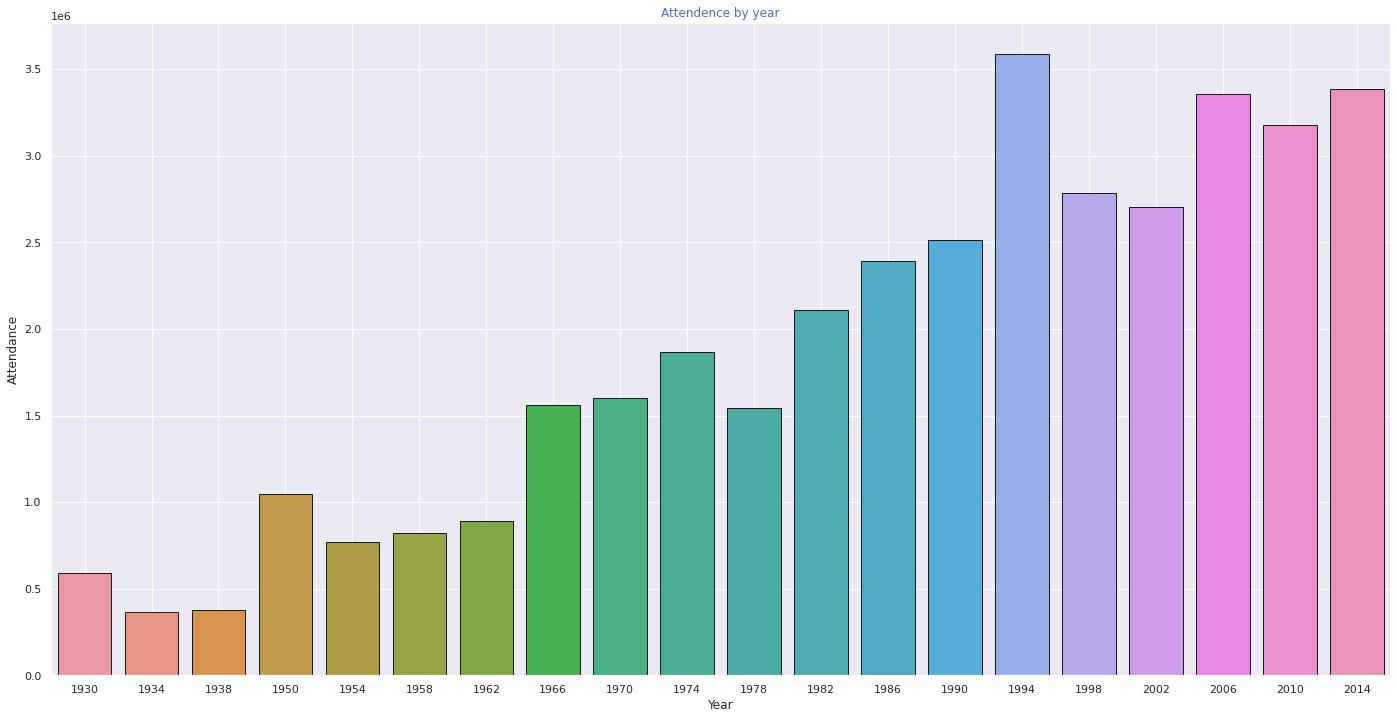

In [ ]:
#Analyze Data
sns.set_style("darkgrid")

#removing duplicate rows for match id column 
df_matches = df_matches.drop_duplicates(subset="MatchID",keep="first")

att = df_matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(24,12))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

Text(0.5, 1.0, 'Qualified Teams Per Year')

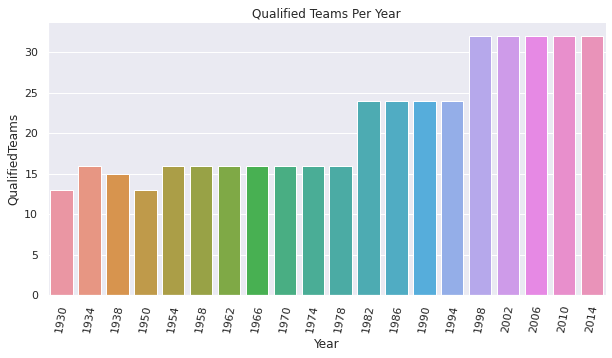

In [ ]:
#Qualified teams per year
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = df_winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

Text(0.5, 1.0, 'Goals Scored by Teams Per Year')

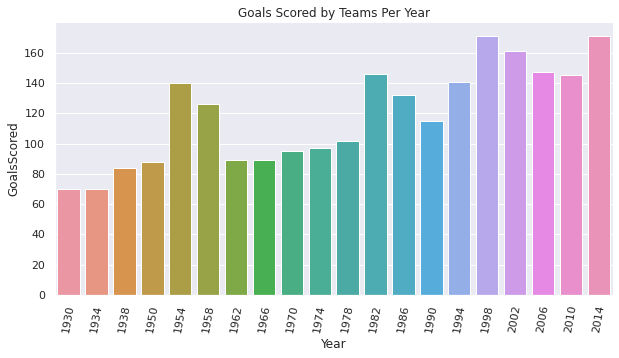

In [ ]:
#Goal scored per year
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = df_winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')

Text(0.5, 1.0, 'Matches Played Scored by Teams Per Year')

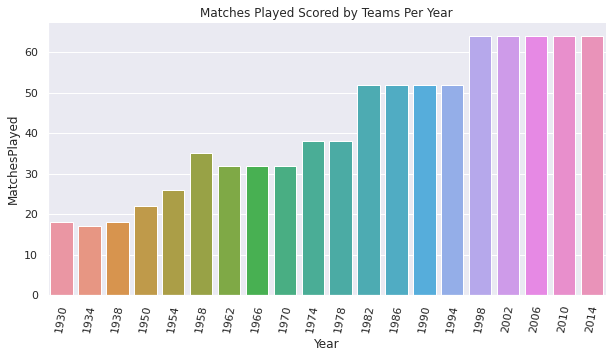

In [ ]:
#Matches Played Scored by Teams Per Year
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = df_winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played Scored by Teams Per Year')

In [ ]:
#Number of goal per country 
df_matches.head(2)
home = df_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = df_matches[['Away Team Name', 'Away Team Goals']].dropna()
home.columns = ['Countries', 'Goals']
away.columns = home.columns
goals = home.append(away, ignore_index = True)
goals = goals.groupby('Countries').sum()
goals = goals.sort_values(by = 'Goals', ascending=False)
goals.reset_index(level=0, inplace=True)
goals

,Countries,Goals
0,Germany,222
1,Brazil,221
2,Argentina,131
3,Italy,128
4,France,106
...,...,...
77,Dutch East Indies,0
78,China PR,0
79,Trinidad and Tobago,0
80,Canada,0


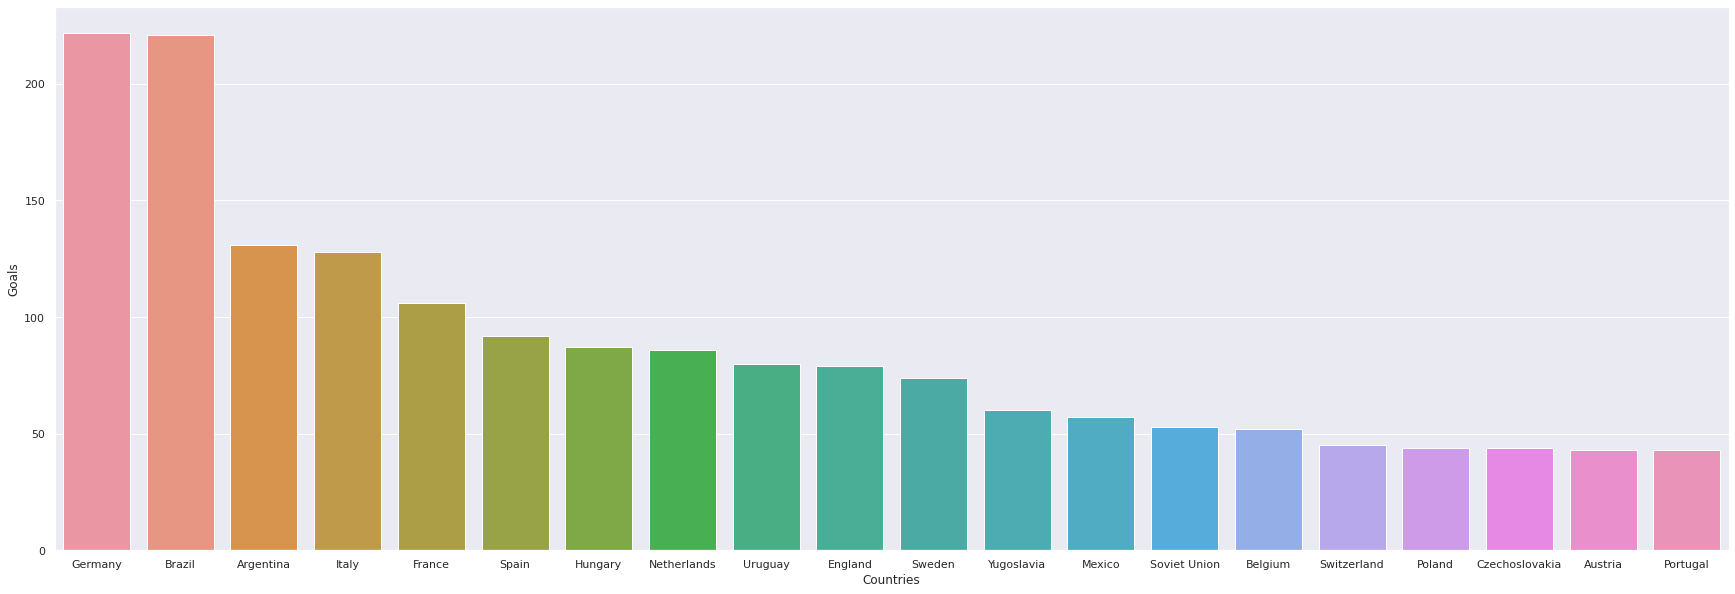

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.barplot(x="Countries", y="Goals", data=goals.head(20))

In [ ]:
#Matches with highest attedance 
df_matches['Datetime'] = pd.to_datetime(df_matches['Datetime'])

In [ ]:
df_matches['Datetime'] = df_matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))

In [ ]:
df_matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Time
0,1930.0,"13 Jul, 30",Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,13/07/1930,15:00
1,1930.0,"13 Jul, 30",Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,13/07/1930,15:00
2,1930.0,"14 Jul, 30",Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,14/07/1930,12:45
3,1930.0,"14 Jul, 30",Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,14/07/1930,14:50
4,1930.0,"15 Jul, 30",Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,15/07/1930,16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,"05 Jul, 14",Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953,3.00187e+08,ARG,BEL,05/07/2014,13:00
832,2014.0,"29 Jun, 14",Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,58817,0,0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951,3.00187e+08,NED,MEX,29/06/2014,13:00
833,2014.0,"29 Jun, 14",Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,3.00186e+08,CRC,GRE,29/06/2014,17:00
834,2014.0,"01 Jul, 14",Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina win after extra time,63255,0,0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951,3.00187e+08,ARG,SUI,01/07/2014,13:00


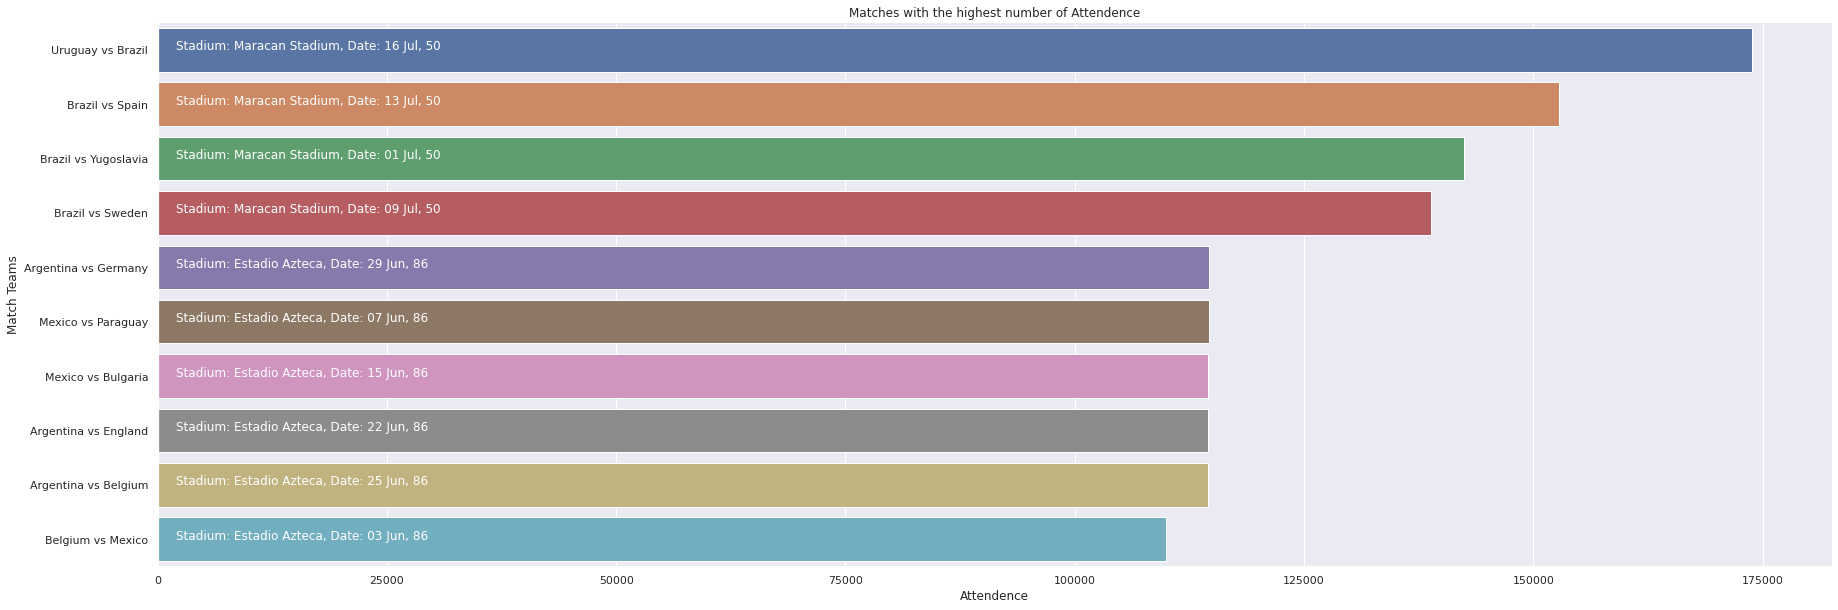

In [ ]:
top10 = df_matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



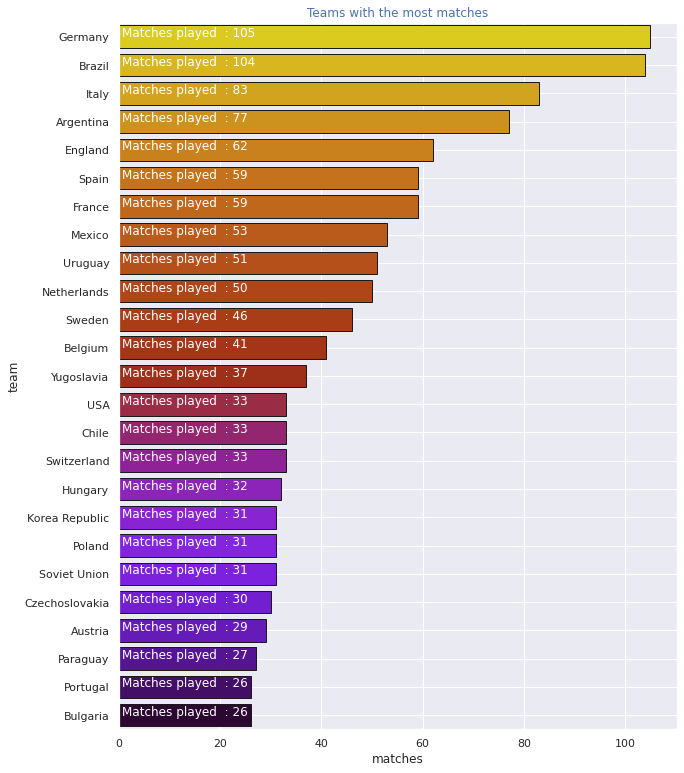

In [ ]:
#Teams with the most world cup matches
ht = df_matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = df_matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1623: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



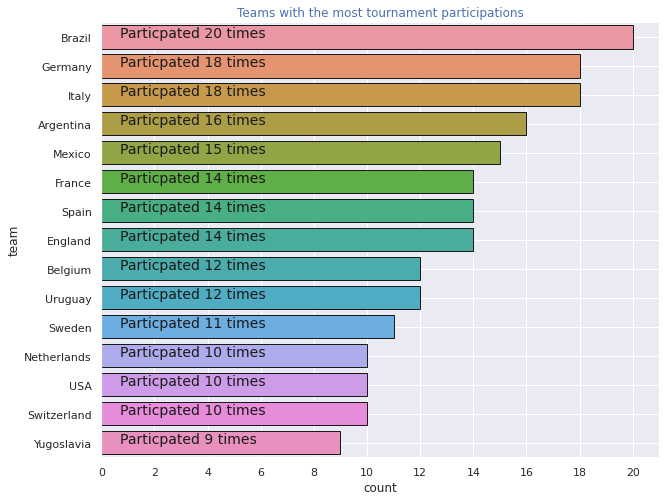

In [ ]:
#Teams with the most tournament participations
hy = df_matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = df_matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()